Import Libraries

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

Dataset titanic_train.csv file from kaggle

In [48]:
titanic_data = pd.read_csv(r"c:\Users\Mac Computer\Documents\Build Profolio Project\Dataset\train.csv")

c:\Users\Mac Computer\Documents\Build Profolio Project\Code Files

In [49]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


EDA Analysis
Let's start with EDA analysis to explore missing data

Missing Data
To create a heatmap uing seaborn to swee where the missing data

In [7]:
titanic_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

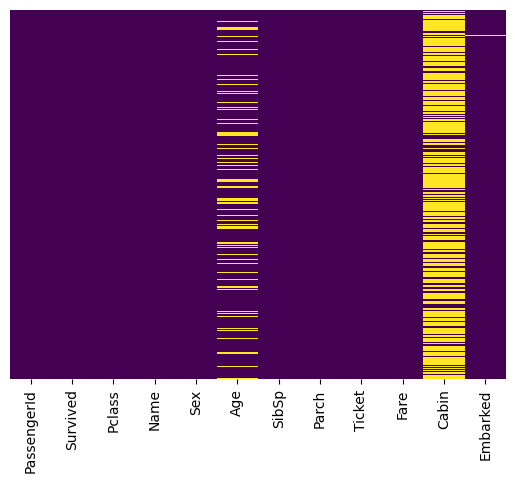

In [12]:
sns.heatmap(titanic_data.isnull(), yticklabels=False, cbar=False, cmap="viridis")

In [13]:
missing_age_count = titanic_data["Age"].isnull().sum()
print(missing_age_count)

177


177 missing data out of 891 rows. Nearly 20 percenrt of age has missing values. So, we have to fing suitable impuation methods.

In [14]:
missing_cabin_count = titanic_data["Cabin"].isnull().sum()
print(missing_cabin_count)

687


687 missing data out of 891 rows. Cabin have many missing data. So, we have to find suitable imputation methods.

Checking tha target Variable with countplot

Count for each:
Survived
0    549
1    342
Name: count, dtype: int64


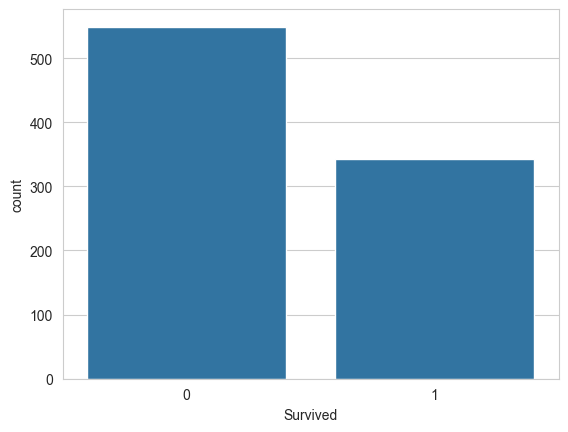

In [16]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data= titanic_data)

# Get counts of 0 and 1
counts = titanic_data['Survived'].value_counts()

print("Count for each:")
print(counts)

<Axes: xlabel='Survived', ylabel='count'>

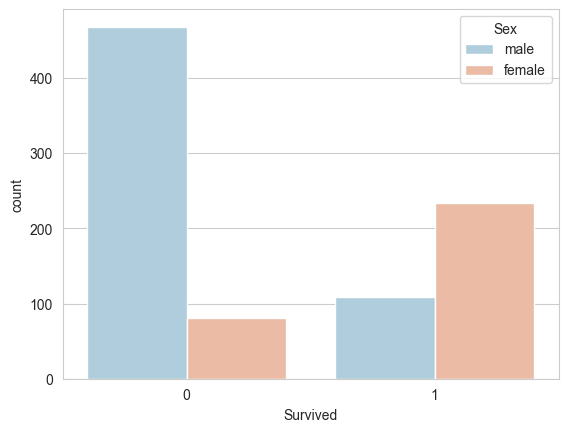

In [17]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex', data= titanic_data, palette='RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

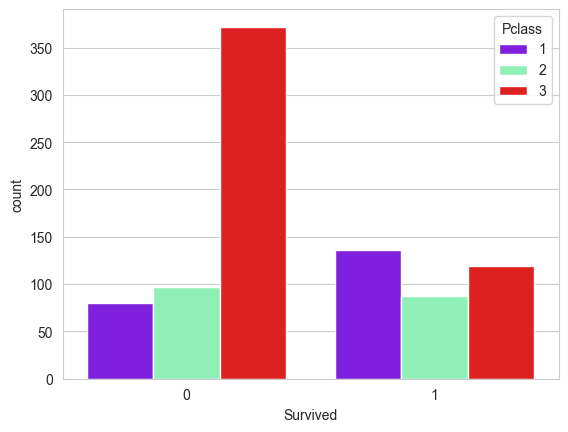

In [21]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Pclass', data= titanic_data, palette='rainbow')

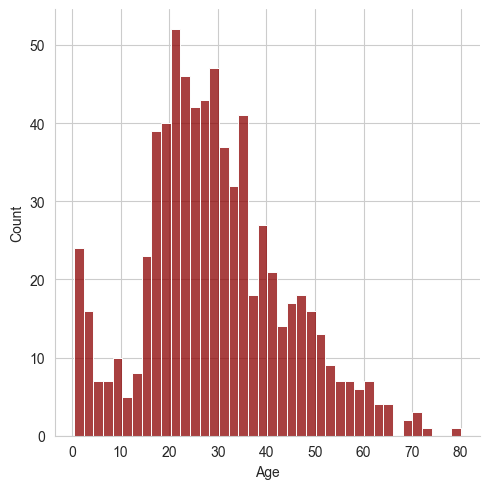

In [22]:
sns.displot(titanic_data['Age'].dropna(), kde=False, color='darkred', bins=40)

<Axes: >

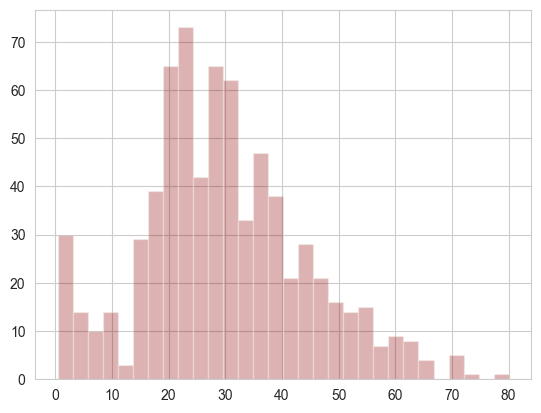

In [26]:
titanic_data['Age'].hist(bins=30, color='darkred', alpha=0.3)

<Axes: xlabel='SibSp', ylabel='count'>

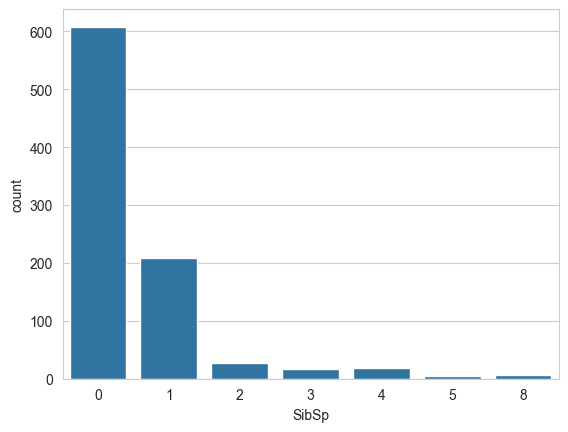

In [27]:
sns.countplot(x='SibSp', data=titanic_data)

<Axes: >

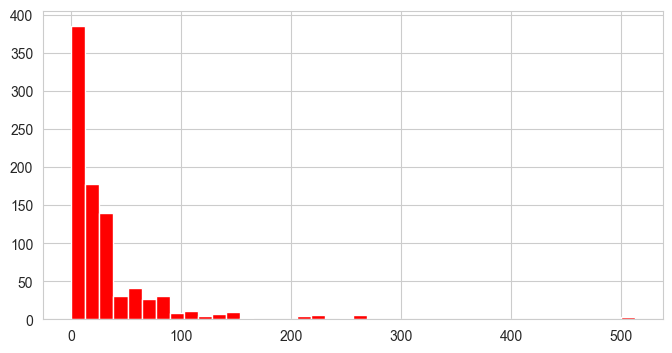

In [28]:
titanic_data['Fare'].hist(color='red', bins=40, figsize=(8,4))

Data Cleaning
Age & Cabin

C:\Users\Mac Computer\AppData\Local\Temp\ipykernel_3972\3153696788.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass', y='Age', data = titanic_data, palette='winter')


<Axes: xlabel='Pclass', ylabel='Age'>

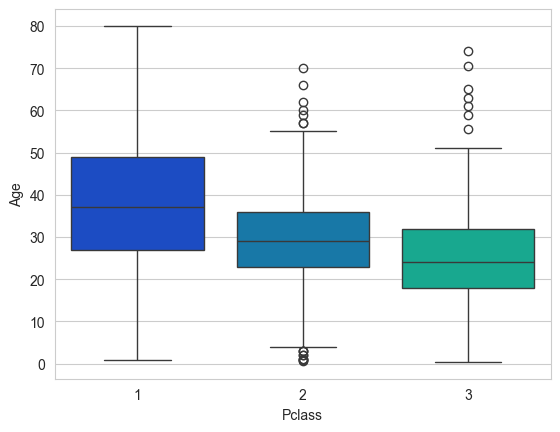

In [29]:
plt.Figure(figsize=(12,7))
sns.boxplot(x='Pclass', y='Age', data = titanic_data, palette='winter')

The plot show the weathier passengers in the higher class tend to be older that makes sense. Use the average age value to impute based on Pclass for age.
Create imput_age Function

In [50]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):
        if Pclass ==1:
            return 37
        elif Pclass ==2:
            return 29
        else:
            return 24
    else:
        return Age    

Now apply this function

In [51]:
titanic_data['Age'] = titanic_data[['Age','Pclass']].apply(impute_age, axis=1)

C:\Users\Mac Computer\AppData\Local\Temp\ipykernel_3972\3809399051.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
C:\Users\Mac Computer\AppData\Local\Temp\ipykernel_3972\3809399051.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


Now let's check that heat map again!

<Axes: >

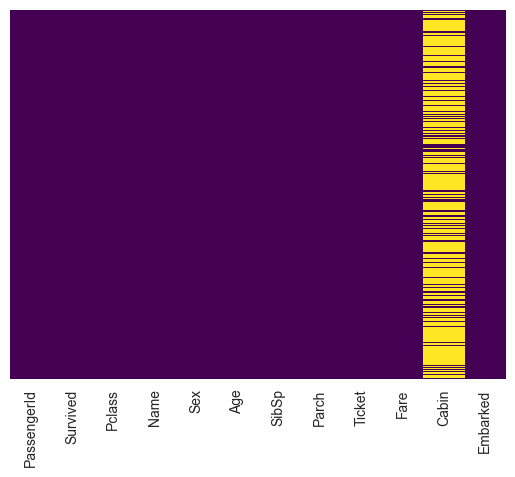

In [52]:
sns.heatmap(titanic_data.isnull(), yticklabels=False, cbar=False, cmap="viridis")

In this project decided to drop Cabin because there are so many missing value and try to solove wiht feacture eningeering so this project is for EDA and visualization. So let's go and drop the cabin column

In [53]:
titanic_data.drop('Cabin', axis=1, inplace=True)

In [54]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<Axes: >

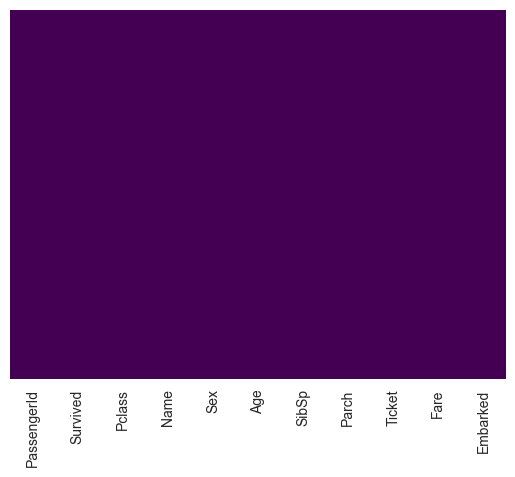

In [55]:
sns.heatmap(titanic_data.isnull(), yticklabels=False, cbar=False, cmap="viridis")

Converting Categorical Feature
Neet to convert categorical features to dummy variable using Pandas. 

In [38]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [56]:
pd.get_dummies(titanic_data['Embarked'], drop_first=True).astype(int).head()


,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [57]:
sex = pd.get_dummies(titanic_data['Sex'], drop_first=True).astype(int)
embark = pd.get_dummies(titanic_data['Embarked'], drop_first= True).astype(int)

In [58]:
titanic_data.drop(['Sex','Embarked','Name','Ticket'], axis=1, inplace= True)

In [59]:
titanic_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


To Combine sex, embark columns with titanci_data usng Concat

In [60]:
titanic_data= pd.concat([titanic_data,sex,embark], axis=1)

In [61]:
titanic_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


Building Logistic Regression model
Let's split train and test data.

Trian Data & Test Data Split

In [68]:
X= titanic_data.drop('Survived', axis=1)


In [64]:
y = titanic_data['Survived']

In [66]:
from sklearn.model_selection import train_test_split

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=101)

Training and Predictin

In [70]:
from sklearn.linear_model import LogisticRegression

In [71]:
model = LogisticRegression()
model.fit(X_train,y_train)

c:\Users\Mac Computer\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [72]:
prediction = model.predict(X_test)

In [73]:
from sklearn.metrics import confusion_matrix
accuracy = confusion_matrix(y_test, prediction)
accuracy

array([[134,  20],
       [ 42,  72]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,prediction)

<function sklearn.metrics._classification.accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None)>

In [75]:
accuracy

0.7686567164179104

In [76]:
prediction

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1])